In [ ]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

In [ ]:
img = cv2.imread('smile.jpg')

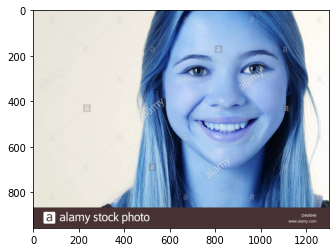

In [8]:
plt.imshow(img)  # BGR

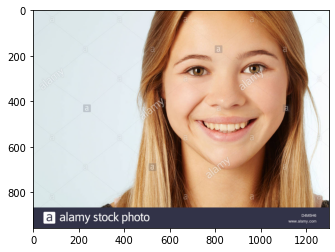

In [9]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
predictions = DeepFace.analyze(img)

In [6]:
predictions

{'emotion': {'angry': 34.44861173629761,
  'disgust': 2.3969591502609466e-10,
  'fear': 63.62406015396118,
  'happy': 0.12195947347208858,
  'sad': 1.8053710460662842,
  'surprise': 1.3344846874676491e-11,
  'neutral': 4.495583016961291e-07},
 'dominant_emotion': 'fear',
 'age': 35.0584019044404,
 'gender': 'Woman',
 'race': {'asian': 16.73911362886429,
  'indian': 9.942445904016495,
  'black': 5.557746812701225,
  'white': 22.74828553199768,
  'middle eastern': 14.873430132865906,
  'latino hispanic': 30.138981342315674},
 'dominant_race': 'latino hispanic'}

### Trying to draw a rectangle at face

In [8]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray,1.1,4)

for(x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 3)

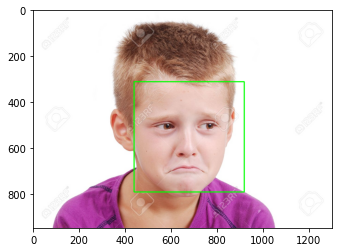

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img, 
            predictions['dominant_emotion'],
            (0,200),
            font, 5,
            (0,0,255),
            3,
            cv2.LINE_4) ;

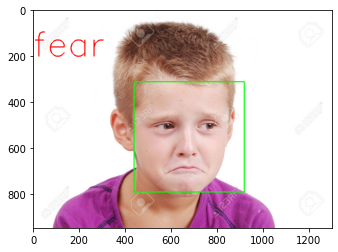

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
img_1 = cv2.imread('smile.jpg')

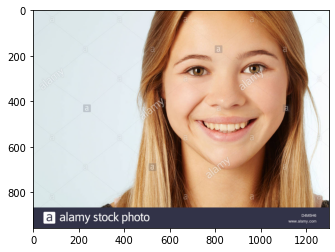

In [16]:
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

In [ ]:
predictions = DeepFace.analyze(img_1)

### For live video streaming analysis

In [ ]:
DeepFace.stream("")

### work in progress

In [13]:
cap = cv2.VideoCapture(1)
# check if webcam is opened correctly 

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
    
if not cap.isOpened():
    raise IOError("cannot open webcam")
    
while True:
    ret,frame = cap.read() # read frame from a video
    predictions = DeepFace.analyze(frame, actions = ['emotion'])
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray,1.1,4)

    for(x, y, w, h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 3)
        
    font = cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(img, 
                predictions['dominant_emotion'],
                (0,200),
                font, 5,
                (0,0,255),
                3,
                cv2.LINE_4)
    cv2.imshow('Original Video', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

ValueError: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.